# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

# Your code here.

# Creating a dictionnary with the list:
Age = [17,51,27,21,36,48,19,26,54,30]
Tardies = [10,1,5,9,4,2,9,6,0,3]

d = {"Age": Age, "Tardies": Tardies}
d

# Making the dataframe:
df = pd.DataFrame(d)
df

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

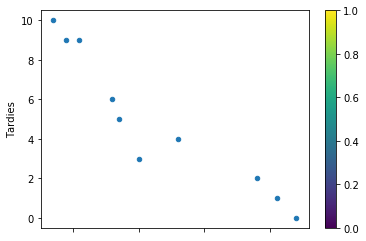

In [10]:
# Your code here.
# Creating the scatterplot:

ax2 = df.plot.scatter(x='Age',y='Tardies',colormap='viridis')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [37]:
# Your response here. 
# There is indeed a trend: the younger students are, the more often they come late. 
# However, there is not much data to base our theory on.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# Your response here.
X = df['Age']
Y = df['Tardies']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)    

# correlation:
print(r_value)
# A negative covariance: Reveals that two variables tend to move in inverse directions. The fact that the correlation is almost 1, 
# shows that there is a strong correlation.

-0.9391626886887121


In [5]:
#covariance:
print(r_value)

-0.9391626886887121


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [13]:
# Your response here.

X = df[['Age']]
Y = df['Tardies']

lm = LinearRegression()
model = lm.fit(X,Y)

print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)

predictions = lm.predict(X)

# Due to the strong correlation, and the straight line a linear regression model will be used.

Intercept:  12.888803363135768
Coef:  [-0.24282077]


Plot your regression model on your scatter plot.

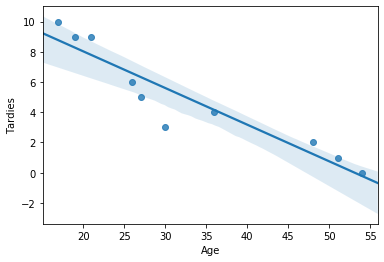

In [7]:
# Plotting the regression model
sns.regplot(x="Age", y="Tardies", data=df)


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 
# Although there is a straight line through the dots, there seem to be some outliers between 30 and 40 years of age.
# Based on the regression model Age doesn´t seem like a good predictor. However, the correlation shows that it is.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [19]:
# Import any libraries you may need & the data

from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns

vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [51]:
# Your response here. 
vehicles['Year'].corr(vehicles['CO2 Emission Grams/Mile'])

-0.22229960295054238

In [50]:
vehicles['Cylinders'].corr(vehicles['CO2 Emission Grams/Mile'])

0.7523925537297486

In [52]:
vehicles['Fuel Barrels/Year'].corr(vehicles['CO2 Emission Grams/Mile'])

0.9861886621428727

In [53]:
vehicles['Combined MPG'].corr(vehicles['CO2 Emission Grams/Mile'])

-0.9262290389336443

In [54]:
vehicles['Fuel Cost/Year'].corr(vehicles['CO2 Emission Grams/Mile'])

0.9308651512201844

In [ ]:
# The Fuel Barrels/Year seem to predict the CO2 Emission Grams/Mile the most, because this is the variable that has the highest
# correlation.
# The variable with the lowest correlation is the Year, so this variable provides the least helpful information.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

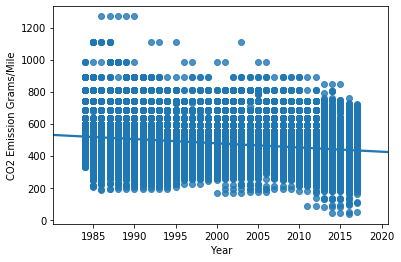

In [57]:
# Your response here. 

# Regression model for the influence of Year on the CO2 Emission Grams/Mile:

sns.regplot(x="Year", y="CO2 Emission Grams/Mile", data=vehicles)

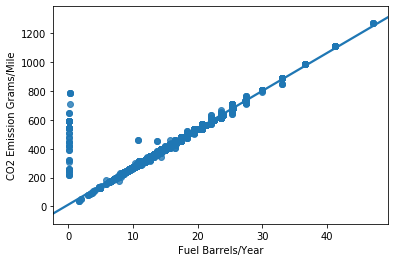

In [20]:
# Regression model for the influence of Fuel Barrels/Year on the CO2 Emission Grams/Mile:
sns.regplot(x="Fuel Barrels/Year", y="CO2 Emission Grams/Mile", data=vehicles)

# Since the correlation between the two variables is very strong, the lineair regression model has been chosen.

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [21]:
# Your response here.

X = vehicles[["Fuel Barrels/Year"]]
Y = vehicles["CO2 Emission Grams/Mile"]

lm = LinearRegression()
model = lm.fit(X,Y)

print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)

predictions  = lm.predict(X)

# Not sure what is meant with the regression summary

Intercept:  12.486520830758195
Coef:  [26.2836254]


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [23]:
# Your code here.
# Creating a dictionnary with the list:
people_inv = [1,3,4,6,8,9,11,14]
people_att = [1,2,4,4,5,7,8,13]

d = {"Invited": people_inv, "Attended": people_att}
d

# Making the dataframe:
df = pd.DataFrame(d)
df

,Invited,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

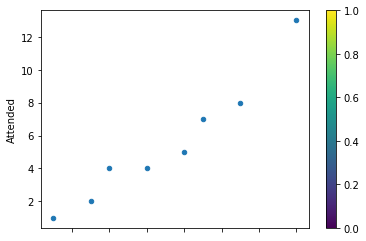

In [24]:
# Your code here.
# Creating the scatterplot:
ax2 = df.plot.scatter(x='Invited',y='Attended',colormap='viridis')

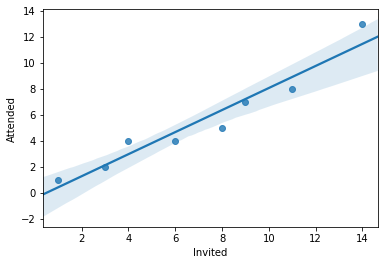

In [25]:
# Creating the regressionline:
sns.regplot(x= "Invited", y= "Attended", data=df)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [27]:
# Your response here: 

# The plot is showing that there is a relationship between the variables, because there is not many residu between
# the points and the regression line.

# Printing the results from the regression:
X = df[["Invited"]]
Y = df["Attended"]

lm = LinearRegression()
model = lm.fit(X,Y)

print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)

predictions  = lm.predict(X)

Intercept:  -0.43939393939393945
Coef:  [0.84848485]


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

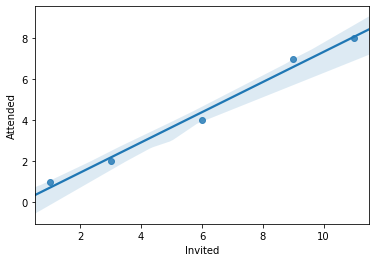

In [71]:
# Your response here. 

# Removing the outliers
people_inv = [1,3,6,9,11]
people_att = [1,2,4,7,8]

d_2 = {"Invited": people_inv, "Attended": people_att}
d_2

# Making the dataframe:
df_2 = pd.DataFrame(d_2)
df_2

sns.regplot(x= "Invited", y= "Attended", data=df_2)

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
# Removing the outliers has made the regression model more accurate. The points are closer to the regression line now.
